In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
## Function for converting ubyte file into CSV file

##Function name: "Convert"
"""
Parameters:
1. "imgs" : The path to the binary image file
2. "labels" : The path to the binary label file
3. "outfile" : The path where the CSV file will be saved
4. "n" : The number of images to process
"""

def convert(imgs, labels, outfile, n):
  """
  Opening the files.
  The function open the image file and label file in binary read mode("rb")
  The function open the output CSV file in write mode("w")
  """
  imagefile = open(imgs, "rb")
  labelfile = open(labels, "rb")
  csvfile = open(outfile, "w")

  """
  Skipping Headers.
  The function reads and discards the first 16  bytes of the image file and the first 8 bytes of the label file. These bytes typically contain metadata about the files, such as magic numbers and dimensions, which are not needed for the conversion.
  """
  imagefile.read(16)
  labelfile.read(8)

  """An empty list named "images" is initailized to store the processed image data."""
  images = []

  """
  Reading images and Labels.
  The outer loop iterates "n" times, where "n" is the number of images to read.
  For each iteration:
    It reads one byte from the label file, which represents the label of the image(converted to an integer using "ord()").
    It then reads 784 bytes(28*28 pixels) from the image file, appending them to the "image" list. Each pixel value is also converted to an integer using "ord()".
    It then stores the processed image in the "images" list
  """
  for i in range(n):
    image = [ord(labelfile.read(1))]
    for j in range(28*28):
      image.append(ord(imagefile.read(1)))
    images.append(image)

  """
  Writing to CSV
  This loop iterates over the "images" list and writes each image's pixel values and label to the CSV file.
  The pixel values are joined into a single string separated by commas, and a newline character is added at the end of each line.
  """
  for image in images:
    csvfile.write(",".join(str(pix) for pix in image)+"\n")

  """
  Finally, the function closes all opened files to free up the system resources.
  """
  imagefile.close()
  labelfile.close()
  csvfile.close()

In [7]:
# Defining the training and the test set of the MNIST Dataset
mnist_train_x = "MNIST_Dataset/train-images.idx3-ubyte"
mnist_train_y = "MNIST_Dataset/train-labels.idx1-ubyte"

mnist_test_x = "MNIST_Dataset/t10k-images.idx3-ubyte"
mnist_test_y = "MNIST_Dataset/t10k-labels.idx1-ubyte"

In [8]:
convert(mnist_train_x, mnist_train_y, "mnist_train.csv", 60000)
convert(mnist_test_x, mnist_train_y, "mnist_test.csv", 10000)

In [14]:
#Opening and reading the training file.

"""
The line opens the file named "mnist_train.csv" in read mode ("r"). This file is expected to contain training data for the MNIST dataset.
"""
train_file = open("mnist_train.csv", "r")

"""
The line reads all the lines from the file and stores them in a list called "train_list". Each element in this list corresponds to a line in the CSV file, which typically contains pixel values and labels for each image.
"""
train_list = train_file.readlines()

"""
The line closes the file to ensure that system resources are released. It is important to close files after you are done with them to prevent memory leaks or file corruption.
"""
train_file.close()


# Opening and reading the test file.

"""
The line opens the file named "mnist_test.csv" in read mode ("r"). This file is expected to contain test data for the MNIST dataset.
"""
test_file = open("mnist_test.csv", "r")

"""
The line reads all the lines from the file and stores them in a list called "test_list". Each element in this list corresponds to a line in the CSV file, which typically contains pixel values and labels for each image.
"""
test_list = test_file.readlines()

"""
The line closes the file to ensure that system resources are released. It is important to close files after you are done with them to prevent memory leaks or file corruption.1
"""
test_file.close()

In [15]:
train_list[100]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,46,136,136,244,255,241,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,94,163,253,253,253,253,238,218,204,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,253,253,253,253,237,200,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,246,253,247,108,65,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,207,253,253,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,157,253,253,125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,250,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,253,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

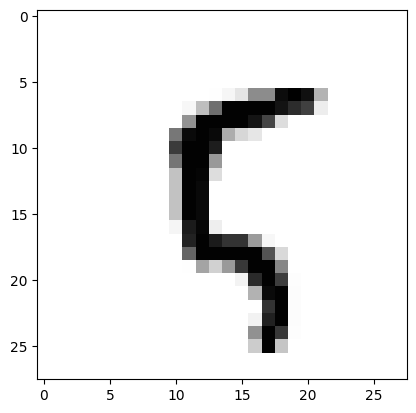

In [16]:
"""
Selecting a Training Example.
  This line selects the 100th element(index 100) from the "train_list" list, which represents a single training example from the MNIST dataset.
  The "split(",")" method splits the selected line(a string) into a list of values, using commas as the delimiter. This effectively separates the label and pixel values.
  The resulting list is then assigned to the variable "values".
"""
values = train_list[100].split(",")

"""
Extracting Pixel Values.
  "values[1:]" selects all the elements from index 1 onwards, effectively skipping the first element which the label.
  "np.asfarray()" converts the selected values to a NumPy array of floating-point numbers.
  "reshape((28, 28))" reshapes the 1D array of pixel values into a 2D array of size 28x28, which corresponds to the dimension of an MNIST image.
"""
image_array = np.asfarray(values[1:]).reshape((28, 28))

"""
Displaying the Image.
  This line uses the "imshow()" function from the Matplotlib library to display the image represented by "image_array".
  "cmap = "Greys" sets the colormap to grayscale, which is suitable for displaying MNIST images.
  "interpolation = "None"" disbales any interpolation, which ensures that the pixels are displayed as-is without any smoothing.
"""
plt.imshow(image_array, cmap = "Greys", interpolation = "None")

In [17]:
class DNN:
  """
  Parameters:
    "sizes" : A list defining the number of inputs in each layer. The default is "[784, 196, 49, 10]", indicating an iput layer with 784 neurons, two hidden layers with 196 and 49 neurons respectively, and an output layer with 10 neurons(for classifying 10 digits).
    "epochs" : The number of training iterations(default is 10).
    "lr" : Learning rate for weight updates(default is 0.001)
  """
  def __init__(self, sizes = [784, 196, 49, 10], epochs = 10, lr = 0.001):
    self.sizes = sizes
    self.epochs = epochs
    self.lr = lr

    input_layer = sizes[0]
    hidden_1 = sizes[1]
    hidden_2 = sizes[2]
    output_layer = sizes[3]

    """
    Weight Initialization:
      The weights for each layer are initialized using a normal distribution scaled by the square root of the number of neurons in the layer. This helps in preventing issues like vanishing or exploding gradients during training.
    """

    self.params = {
        "W1" : np.random.randn(hidden_1, input_layer) * np.sqrt(1./hidden_1),      # 196x784
        "W2" : np.random.randn(hidden_2, hidden_1) * np.sqrt(1./hidden_2),         # 49x196
        "W3" : np.random.randn(output_layer, hidden_2) * np.sqrt(1./output_layer)  # 10x49
    }


    #Activation Function:

  """
  Sigmoid: Used as an activation function for hidden layers. It squashes inputs to a range between 0 and 1.
  """
  def sigmoid(self, x, derivative = False):
    if derivative:
      return (np.exp(-x)) / (np.exp(-x) + 1)**2
    return 1 / (1 + np.exp(-x))

  """
  Tanh: Another activation function that outputs values between -1 and 1. Although defined, it is not used in the forward pass in this implementation.
  """
  def tanH(self, x, derivative = False):
    if derivative:
      return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    return np.tanh(x)

  """
  Softmax: Used in the output layer to convert logits into probabilites. It ensures the output sums to 1, making it suitable for multi-class classification.
  """
  def softmax(self, x, derivative = False):
    exps = np.exp(x - x.max())
    if derivative:
      return exps / np.sum(exps, axis = 0) * (1 - exps/np.sum(exps, axis = 0))
    return exps / np.sum(exps, axis = 0)

  # Forward Pass: "forward_pass"
  """
  This method computes the output of the network given an input "x_train".
  It performs the following steps:
    Computes the weighted sum (linear transformation) for each layer ("Z1", "Z2", "Z3").
    Applies the activation functions to these sums to obtain the activations for each layer ("A1", "A2", "A3").
  The final output is the softmax probabilites for the classes.
  """

  def forward_pass(self, x_train):
    params = self.params

    params["A0"] = x_train

    # Input Layer to Hidden_1
    params["Z1"] = np.dot(params["W1"], params["A0"])
    params["A1"] = self.sigmoid(params["Z1"])

    # Hidden_1 to Hidden_2
    params["Z2"] = np.dot(params["W2"], params["A1"])
    params["A2"] = self.sigmoid(params["Z2"])

    # Hidden_2 to Output Layer
    params["Z3"] = np.dot(params["W3"], params["A2"])
    params["A3"] = self.softmax(params["Z3"])

    return params["A3"]

  # Backward Pass:"backward_pass"
  """
  This method computes the gradients for updating the weights based on the error of the output.
  It calculates the error for the output layer and propagates it backward through the network:
    Computes the gradient for "W3" (output layer weights) using the derivative of the softmax function.
    Computes the gradient for "W2" and "W1" using the chain rule, applying the derivatives of the sigmoid activation function.
  """
  def backward_pass(self, y_train, output):
    params = self.params

    change_w = {}

    # Calculate W3 Update
    error = 2 * (output - y_train) / output.shape[0] * self.softmax(params["Z3"], derivative = True)
    change_w["W3"] = np.outer(error, params["A2"])

    # Calculate W2 Update
    error1 = np.dot(params["W3"].T, error) * self.sigmoid(params["Z2"], derivative = True)
    change_w["W2"] = np.outer(error1, params["A1"])

    # Calculate W1 Update
    error2 =  np.dot(params["W2"].T, error1) * self.sigmoid(params["Z1"], derivative = True)
    change_w["W1"] = np.outer(error2, params["A0"])

    return change_w

  # Weight Update: "update_weights"
  """
  This method updates the weights of the network using the computed gradients from the backward pass, scaled by the learning rate.
  """
  def update_weights(self, change_w):
    for key, val in change_w.items():
      self.params[key] -= self.lr * val

  # Accuracy Computation: "compute_accuracy"
  """
  This method evaluates the model's performance on test data.
  It processes each test sample, normalizes the input, and computes the network's output.
  It compares the predicted class(using "np.argamax" on the output probabilites) with the true class to compute accuracy.
  """
  def compute_accuracy(self, test_data):
    predictions = []
    for x in train_list:
      values = x.split(",")
      inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
      targets = np.zeros(10) + 0.001
      targets[int(values[0])] = 0.99
      output = self.forward_pass(inputs)
      pred = np.argmax(output)
      predictions.append(pred == np.argmax(targets))

    return np.mean(predictions)

  # Training Method: "train"
  """
  This method orchestrates the training process:
    Loops through the specified number of epochs.
    For each training sample, it performs the forward and backward passes and updates the weights.
    After each epoch, it computes and prints the accuracy on the test data.
    After each epoch, it computes and prints the accuracy on the test set.
  """

  def train(self, train_list, test_list):
    """
    Epoch Loop: The outer loop iterates over the number of epochs during initialization("Self.epochs"). Each epoch represents one complete pass through the training data.
    """
    for i in range(self.epochs):
      """
      Time Tracking: "start_time = time.time()" records the start time of the poch to measure how long it takes to complete.
      """
      start_time = time.time()
      """
      Training Sample Loop: The inner loop iterates over each training sample in "train_list".
      """
      for x in train_list:
        # Data Preparation
        """
        Splitting Input:
          "values = x.split(",") splits the string representation of the sample into a list of strings.
          The first element ("values") is the label (the true class), and the remaining elements are pixel values.
        """
        values = x.split(",")
        """
        Normalization:
          "inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01)" converts the pixel values to a numpy array, normalizes them to a range between 0.01 and 1.0. This is done to ensure that the input values are not too small or too large, which can help with training stability.
        """
        inputs = (np.asfarray(values[1:]) / 255.0 * 0.99) + 0.01
        """
        Target Vector:
          "targets = np.zeros(10) + 0.001" initializes a target vector of size 10(for 10 classes), setting all values to 0.001. This small value helps prevent issues with zero probabilites during training.
          "targets[int(values[0])] = 0.99" sets the target value for the true class to 0.99, indicating the expected output for this sample.
        """
        targets = np.zeros(10) + 0.001
        targets[int(values[0])] = 0.99

        """
        Forward Pass:
          "output = self.forward_pass(inputs)" calls the "forward_pass" method with the normalized inputs to compute the network's output probabilites for the classes.
        """
        output = self.forward_pass(inputs)

        """
        Backward Pass:
          "change_w = self.backward_pass(targets, output)" calls the "backward_pass" method, passing the true targets and the predicted output. This method calculates the gradients of the weights based on the error between the predicted output and the true targets.
        """
        change_w = self.backward_pass(targets, output)

        """
        Weight Update:
          "self.update_weights(change_w)" updates the weights of the network using the computed gradients form the backward pass.
        """
        self.update_weights(change_w)

      accuracy = self.compute_accuracy(test_list)
      print(f"Epochs: {i+1}, Time Spent: {(time.time() - start_time):.2f}, Accuracy: {accuracy*100 : .2f}")

In [18]:
dnn = DNN(sizes = [784, 196, 49, 10], epochs = 30, lr = 0.001)

In [19]:
dnn.train(train_list, test_list)

Epochs: 1, Time Spent: 132.49, Accuracy:  21.38
Epochs: 2, Time Spent: 130.98, Accuracy:  33.14
Epochs: 3, Time Spent: 128.66, Accuracy:  33.92
Epochs: 4, Time Spent: 128.55, Accuracy:  34.88
Epochs: 5, Time Spent: 129.10, Accuracy:  38.71
Epochs: 6, Time Spent: 129.31, Accuracy:  43.02
Epochs: 7, Time Spent: 130.53, Accuracy:  46.55
Epochs: 8, Time Spent: 133.35, Accuracy:  49.91
Epochs: 9, Time Spent: 129.48, Accuracy:  52.97
Epochs: 10, Time Spent: 130.67, Accuracy:  55.81
Epochs: 11, Time Spent: 129.02, Accuracy:  58.24
Epochs: 12, Time Spent: 130.19, Accuracy:  60.17
Epochs: 13, Time Spent: 130.96, Accuracy:  61.76
Epochs: 14, Time Spent: 130.15, Accuracy:  62.99
Epochs: 15, Time Spent: 127.64, Accuracy:  64.22
Epochs: 16, Time Spent: 130.63, Accuracy:  65.29
Epochs: 17, Time Spent: 129.11, Accuracy:  66.20
Epochs: 18, Time Spent: 127.66, Accuracy:  67.03
Epochs: 19, Time Spent: 128.24, Accuracy:  67.81
Epochs: 20, Time Spent: 136.17, Accuracy:  68.48
Epochs: 21, Time Spent: 132.2